In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

2024-12-21 12:41:01.396987: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-21 12:41:01.855470: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-21 12:41:01.857966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-21 12:41:04.397628: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
(xtrain, ytrain),(xtest, ytest) = tf.keras.datasets.mnist.load_data()

In [20]:
print(xtrain.shape)

(60000, 28, 28)


In [22]:
xtrain, xtest = xtrain/255, xtest/255

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [24]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'),       
    Dense(10, activation='softmax')
])

2024-12-21 13:14:49.940434: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-12-21 13:14:49.940603: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: ananthu-ASUS-TUF-Gaming-F15-FX506LH-FX506LH
2024-12-21 13:14:49.940643: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: ananthu-ASUS-TUF-Gaming-F15-FX506LH-FX506LH
2024-12-21 13:14:49.941808: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 565.57.1
2024-12-21 13:14:49.942144: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 565.57.1
2024-12-21 13:14:49.942205: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 565.57.1


In [26]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_split=0.2)

2024-12-21 13:15:38.221800: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 0.2688 - accuracy: 0.9216 - val_loss: 0.1303 - val_accuracy: 0.9599
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1071 - accuracy: 0.9675 - val_loss: 0.1075 - val_accuracy: 0.9670
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0739 - accuracy: 0.9776 - val_loss: 0.1117 - val_accuracy: 0.9689
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0572 - accuracy: 0.9817 - val_loss: 0.0944 - val_accuracy: 0.9737
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0434 - accuracy: 0.9853 - val_loss: 0.0897 - val_accuracy: 0.9735
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0370 - accuracy: 0.9877 - val_loss: 0.0954 - val_accuracy: 0.9737
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0890 - val_accuracy

In [27]:
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 [==============================] - 1s 1ms/step - loss: 0.1043 - accuracy: 0.9745
Test Accuracy: 0.97


In [38]:
ypred = model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [40]:
ypred[0]
y_pred_classes = np.argmax(ypred, axis=1)
y_pred_classes[0]

7

In [35]:
from sklearn.metrics import classification_report

report = classification_report(ytest, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [42]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(ytest, y_pred_classes)
print(conf_matrix)

[[ 963    0    1    1    2    4    3    1    1    4]
 [   0 1124    2    2    0    0    2    1    4    0]
 [   7    2  997    3    3    0    4   10    5    1]
 [   0    1    5  984    0    3    0    3    8    6]
 [   1    5    1    0  954    0    5    2    2   12]
 [   3    0    0   11    1  862    8    0    4    3]
 [   3    3    0    1    4    4  941    0    1    1]
 [   1    7    9    2    1    1    0  988    2   17]
 [   2    3    1    3    4    3    2    3  949    4]
 [   2    5    0    3    9    3    0    2    2  983]]


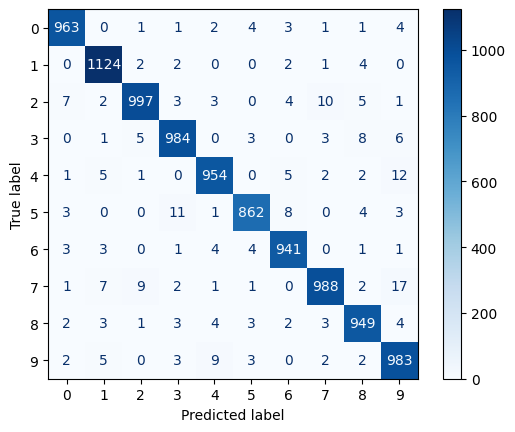

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues)

In [45]:
import pickle

with open('mnist_model.pkl', 'wb') as file:
    pickle.dump(model, file)
